<h1 style="font-size: 36px; text-align: center !important">Projet IA [Human For You]</h1>


# Livrable : 

## Sous-titre: Livrable Technique - Présentation

---

### GROUP 04 
- LAGGOUNE Amine
- SACLIER Victor
- BOISSEL Arnaud



---

<center>
<img src='https://blog.integral-system.fr/wp-content/uploads/2020/02/33797061-1920x1359.jpg' />
</center>

---

### Date: [31/01/2024]



## Introduction



---

## Objectifs

- Préparation de notre jeux de données.


- Etude des différents modèles d'apprentissage.


- Le choix du modèle retenu (Avec justification).


- Nos résultats finaux avec proposition de pistes d'amélioration.

---

## Table des Matières

1. Chapitre 1
2. Chapitre 2
3. Chapitre 3
4. Conclusion

---







---

<center>
© [FISA  A5 INFO], [2024]
</center>


In [6]:
# imports
import os
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sn
import warnings
from sklearn.impute import SimpleImputer

# on filtre les warnings
warnings.filterwarnings('ignore')

# stabilité du notebook d'une exécution à l'autre
random = default_rng(42)

# Ajustement des tailles des labels graphiques utilisé dans le notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Implementation des fonctions pour Importer, Lire et exporter les données de notre dataset

In [7]:
PROJECT_ROOT_DIR = "."
DATA_PATH = "datasets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


def load_data(path, filename):
    file_path = os.path.join(path, filename)
    return pd.read_csv(file_path)

### Import des données issue des datasets
- __employee_data__ : Cette variable va contenir les informations générales des employées.
- __employee_survey__ : Cette variable va contenir les informations d'enquêtes des employées.
- __manager_survey__ : Cette variable va contenir les informations d'enquêtes des managers.
- __in_time__ et __out_time__ : Ces deux variables vont contenir les données du pointage des employées, càd, le temps d'entrée et de sortie de chaque employée.

In [8]:
employee_data = load_data(DATA_PATH, 'general_data.csv')
employee_survey = load_data(DATA_PATH, 'employee_survey_data.csv')
manager_survey = load_data(DATA_PATH, 'manager_survey_data.csv')
in_time = load_data(DATA_PATH, 'in_time.csv')
out_time = load_data(DATA_PATH, 'out_time.csv')

# Analyse préliminaire
##  1- Analyse de données des horaires de travail

In [9]:
in_time.head(4)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15


In [10]:
in_time.info()
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


### 1.1Analyse du DataFrame `in_time`

### Structure Générale
- **Nombre d'Entrées (Lignes):** 4410
- **Nombre de Colonnes:** 262
- **Type de Données:** 
  - Numériques: `float64` (12 colonnes), `int64` (1 colonne)
  - Catégorielles/Textuelles: `object` (249 colonnes)



##  2- Analyse de données issue du service des ressources humaines

In [11]:
employee_data.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0


In [12]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### 2.1 Analyse du DataFrame `employee_data`  

### Aperçu Général
- **Entrées (Lignes):** 4410
- **Colonnes:** 24
- **Type de Données:** 
  - Numériques: `int64` et `float64`
  - Catégorielles: `object`

### Gestion des Données Manquantes
- **Colonnes avec Données Manquantes:** 
  - `NumCompaniesWorked` <span style="color:red;">(19 valeurs manquantes)</span>
  - `TotalWorkingYears` <span style="color:red;">(9 valeurs manquantes)</span>


### Détails des Colonnes
- **Variables Numériques:** 
  - Exemples: `Age`, `DistanceFromHome`, `Education`, `MonthlyIncome`
- **Variables Catégorielles:** 
  - Exemples: `Attrition`, `BusinessTravel`, `Department`
 



##  2- Analyse de données évaluation du manager &  Enquête qualité de vie au travail

In [13]:
manager_survey.head(1)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3


In [14]:
employee_survey.head(1)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0


In [15]:
manager_survey.info()
employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB



## Structure Générale
- **Nombre d'Entrées (Lignes):** 4410
- **Nombre de Colonnes:** 4
- **Types de Données:**
  - `int64`: 1 colonne (`EmployeeID`)
  - `float64`: 3 colonnes (`EnvironmentSatisfaction`, `JobSatisfaction`, `WorkLifeBalance`)

## Détails des Colonnes
- **`EmployeeID` (Intégralité des Données Présentes):**
  - 4410 valeurs non-nulles, identifiant unique pour chaque employé.
- **`EnvironmentSatisfaction` (25 Valeurs Manquantes):**
  - 4385 valeurs non-nulles, évaluation de la satisfaction environnementale (float).
- **`JobSatisfaction` (20 Valeurs Manquantes):**
  - 4390 valeurs non-nulles, évaluation de la satisfaction professionnelle (float).
- **`WorkLifeBalance` (38 Valeurs Manquantes):**
  - 4372 valeurs non-nulles, évaluation de l'équilibre travail-vie personnelle (float).



# Conclusion de l'Analyse Préliminaire

## Observations Clés
- Les DataFrames `in_time` et `out_time` **ne contiennent pas de colonne `EmployeeID`**. Cependant, ils incluent une colonne `Unnamed` qui, après examen, semble faire référence à l'`EmployeeID`.

- **Présence de Valeurs 'NaN'** : Ces valeurs sont observées dans certaines variables et pourraient être interprétées comme des jours où les employés étaient absents.

## Prochaines Étapes
- **Calcul du Temps Moyen Passé en Entreprise** : L'objectif immédiat est de calculer la durée moyenne de présence des employés sur le lieu de travail.

- **Fusion des Données** : Après avoir calculé cette métrique, nous prévoyons de fusionner `in_time`, `out_time` et d'autres informations pertinentes dans **un seul et unique DataFrame**. Ce processus facilitera une analyse globale et détaillée des données des employés.



On fait une copie de `in_time` et `out_time`  pour eviter de modifier les originaux 

In [16]:
InTime_copy = in_time.copy()
OutTime_copy = out_time.copy()

In [17]:
InTime_copy.rename(columns={InTime_copy.columns[0]: 'EmployeeID'}, inplace=True)
OutTime_copy.rename(columns={OutTime_copy.columns[0]: 'EmployeeID'}, inplace=True)

In [18]:
for date in InTime_copy.columns[1:]:  # en supposant que la première colonne est EmployeeID
    InTime_copy[date] = pd.to_datetime(InTime_copy[date])
    OutTime_copy[date] = pd.to_datetime(OutTime_copy[date])

    # Remplacer NaN par 0 avant de calculer la différence

    InTime_copy[date] = (OutTime_copy[date] - InTime_copy[date]).dt.total_seconds() / 3600


In [19]:
InTime_copy.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,...,NaN,7.339167,7.395833,6.504722,7.596389,NaN,7.773889,7.315000,7.778889,7.080278
1,2,NaN,8.109167,7.454722,NaN,7.396944,7.416667,7.150833,7.611389,7.278889,...,7.903056,7.753889,7.712222,7.435556,NaN,NaN,7.614722,7.982500,7.986111,8.227222
2,3,NaN,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,...,6.785833,7.163611,6.801667,6.730278,6.849722,NaN,7.023889,7.438889,7.538889,6.786389
3,4,NaN,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,...,7.629167,6.846667,7.326389,7.413611,7.085000,NaN,7.447222,7.416667,7.366389,7.133056
4,5,NaN,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,...,7.903611,7.665000,7.957500,7.786944,8.249444,NaN,7.662222,8.268611,7.953333,8.018056


In [20]:
# Calcul de la moyenne
average_presence = InTime_copy.iloc[:, 1:].mean(axis=1)
average_presence_df = pd.DataFrame({'EmployeeID': InTime_copy['EmployeeID'], 'AveragePresence': average_presence})
average_presence_df

,EmployeeID,AveragePresence
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175
...,...,...
4405,4406,8.522277
4406,4407,6.092954
4407,4408,7.706632
4408,4409,9.492595


In [21]:
# Fusion avec general_data
merged_data_with_time = employee_data.merge(average_presence_df, on='EmployeeID')
merged_data_with_survey = merged_data_with_time.merge(manager_survey, on='EmployeeID')
general_dataset =  merged_data_with_survey.merge(employee_survey,on='EmployeeID')

In [22]:
general_dataset.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,7.373651,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,7.718969,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,7.013240,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,7.193678,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,8.006175,3,3,4.0,1.0,3.0


In [23]:
general_dataset.info()
general_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,2.799320,7.008163,2.187755,4.123129,7.700792,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,1.288978,6.125135,3.221699,3.567327,1.340218,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,5.950504,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,6.673333,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,7.406761,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,8.368703,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,11.030960,4.000000,4.000000,4.000000,4.000000,4.000000


In [24]:
unique_job_roles = general_dataset['EducationField'].unique()

In [25]:
unique_job_roles

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [26]:
general_data_copy = general_dataset.copy()
compatibility_dict = {
    "Life Sciences": ["Healthcare Representative", "Laboratory Technician", "Research Scientist", "Research Director"],
    "Medical": ["Healthcare Representative", "Laboratory Technician", "Research Scientist", "Research Director"],
    "Marketing": ["Sales Executive", "Sales Representative"],
    "Technical Degree": ["Research Scientist", "Manufacturing Director", "Laboratory Technician"],
    "Human Resources": ["Human Resources"],
    "Other": ["Sales Executive", "Human Resources", "Research Scientist", "Manager"],
    
}
def check_compatibility(row):
    compatible_roles = compatibility_dict.get(row['EducationField'], [])
    if row['JobRole'] in compatible_roles:
        return 1
    return 0



general_data_copy['JobCompatibility'] = general_data_copy.apply(check_compatibility, axis=1)

In [27]:
pd.set_option('display.max_columns', 31)
general_data_copy['Attrition'] = general_data_copy['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
general_data_copy.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,7.373651,3,3,3.0,4.0,2.0,1
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,7.718969,2,4,3.0,2.0,4.0,1
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7.013240,3,3,2.0,2.0,1.0,1
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,7.193678,2,3,4.0,4.0,3.0,0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,8.006175,3,3,4.0,1.0,3.0,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>],
       [<AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title

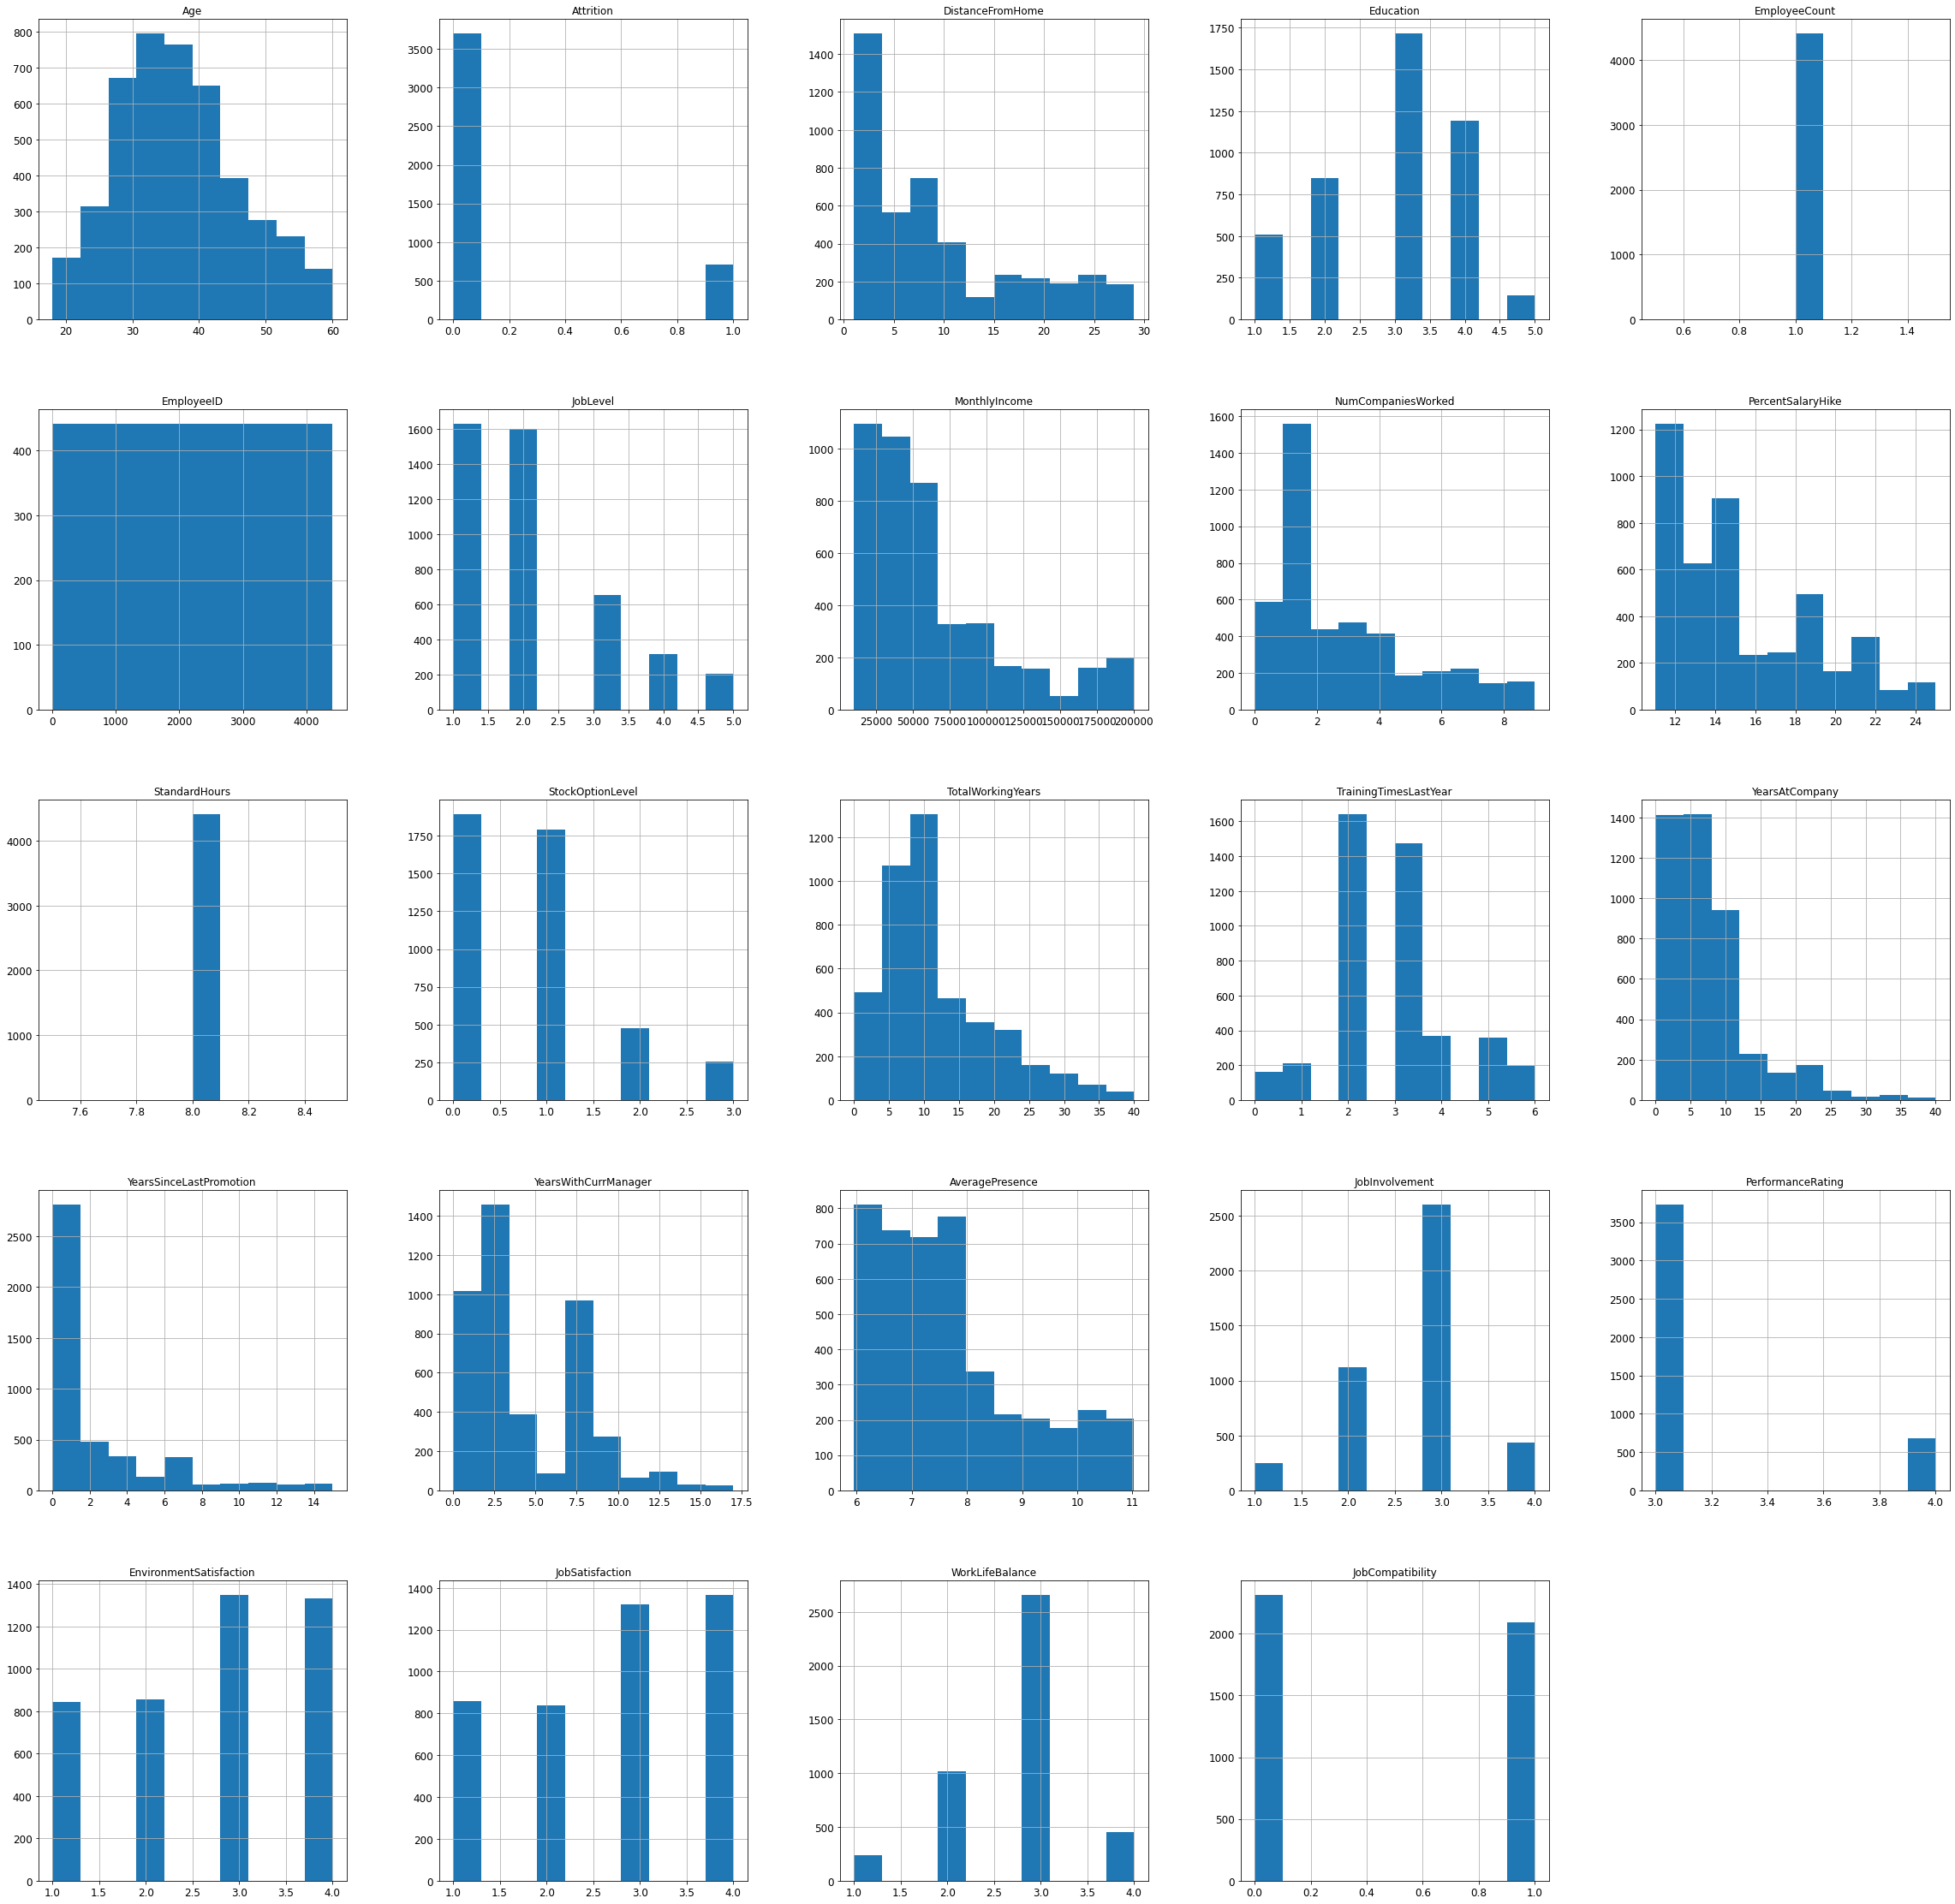

In [28]:
general_data_copy.hist(figsize=(40, 40))

In [29]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# Supposons que general_data_copy est votre DataFrame
# general_data_copy = ...

# Création du dossier pour les graphiques s'il n'existe pas
folder_name = 'dataset_histograms'
os.makedirs(folder_name, exist_ok=True)

# Séparation des colonnes en numériques et non numériques
numeric_columns = general_data_copy.select_dtypes(include=[np.number]).columns
non_numeric_columns = general_data_copy.select_dtypes(exclude=[np.number]).columns

# Réglages de style pour les graphiques
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12, 'figure.facecolor': 'white'})

# Génération et sauvegarde des histogrammes pour les colonnes numériques
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    # Les couleurs par défaut seront utilisées ici
    general_data_copy[column].hist(bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Ajout d'un quadrillage pour une meilleure lisibilité
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    # Sauvegarde de l'histogramme
    plt.savefig(f'{folder_name}/hist_{column}.png', bbox_inches='tight', facecolor='white')
    plt.close()

# Génération et sauvegarde des graphiques à barres pour les colonnes non numériques
for column in non_numeric_columns:
    value_counts = general_data_copy[column].value_counts()
    plt.figure(figsize=(10, 6))
    # Les couleurs par défaut seront utilisées ici
    value_counts.plot(kind='bar', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Ajout d'un quadrillage pour une meilleure lisibilité
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    
    # Sauvegarde du graphique à barres
    plt.savefig(f'{folder_name}/bar_{column}.png', bbox_inches='tight', facecolor='white')
    plt.close()


In [30]:
# Identifier les colonnes avec des valeurs constantes
cols_to_drop = [col for col in general_data_copy.columns if general_data_copy[col].nunique() == 1]
# Supprimer ces colonnes du DataFrame
general_data_copy.drop(cols_to_drop, axis=1, inplace=True)
# Afficher les colonnes à supprimer
print(f"Colonnes à supprimer car elles contiennent des valeurs constantes : {cols_to_drop}")

Colonnes à supprimer car elles contiennent des valeurs constantes : ['EmployeeCount', 'Over18', 'StandardHours']


In [31]:
imputer = SimpleImputer(strategy='mean')

cols_to_impute = ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
general_data_copy[cols_to_impute] = imputer.fit_transform(general_data_copy[cols_to_impute])

In [32]:
general_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  PercentSalaryHike       

In [33]:
#Suppresion des données pour raison éthique
general_data_copy.drop(['EmployeeID', 'Age', 'Gender', 'MaritalStatus'], axis=1, inplace=True)


In [34]:
#suppression de la colonne PerformanceRating, ses données ne sont pas pertinentes
general_data_copy.drop('PerformanceRating', axis=1, inplace=True)

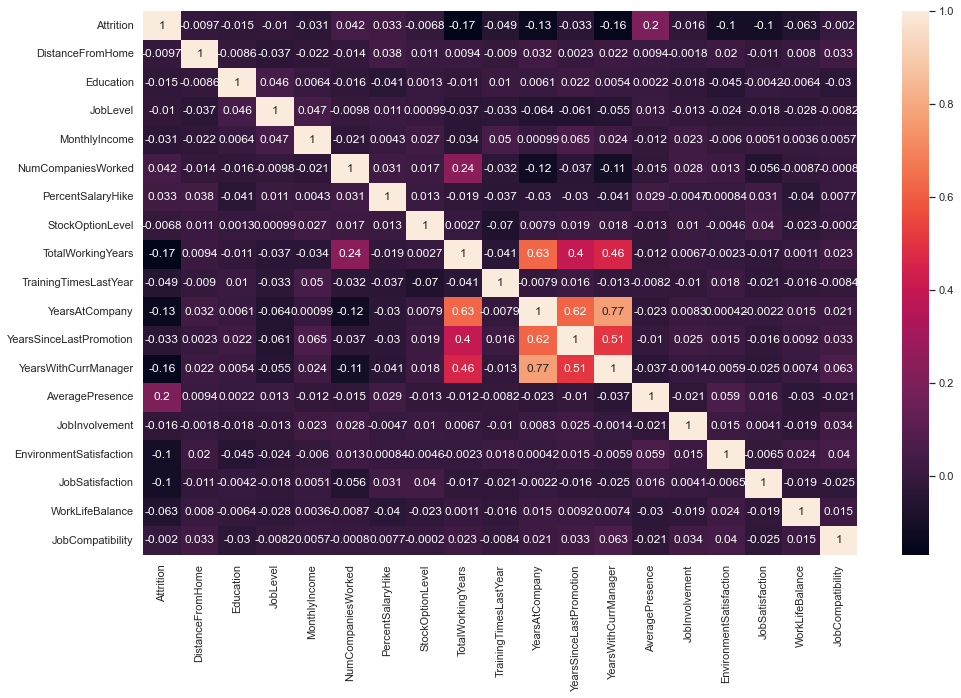

,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
Attrition,1.000000,-0.009730,-0.015111,-0.010290,-0.031176,0.042232,0.032533,-0.006839,-0.170111,-0.049431,-0.134392,-0.033019,-0.156199,0.201688,-0.015588,-0.101795,-0.102743,-0.062561,-0.001981
DistanceFromHome,-0.009730,1.000000,-0.008638,-0.037329,-0.021607,-0.013818,0.038125,0.011169,0.009361,-0.009001,0.031684,0.002290,0.021584,0.009429,-0.001837,0.020109,-0.011119,0.007961,0.032884
Education,-0.015111,-0.008638,1.000000,0.045746,0.006410,-0.016219,-0.040531,0.001261,-0.010712,0.010472,0.006080,0.022490,0.005358,0.002229,-0.018279,-0.045317,-0.004160,-0.006388,-0.029568
JobLevel,-0.010290,-0.037329,0.045746,1.000000,0.047316,-0.009844,0.010973,0.000993,-0.036934,-0.032500,-0.064219,-0.060811,-0.055251,0.012559,-0.012630,-0.024409,-0.018230,-0.027538,-0.008167
MonthlyIncome,-0.031176,-0.021607,0.006410,0.047316,1.000000,-0.020710,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304,-0.012223,0.023346,-0.005981,0.005055,0.003553,0.005665
NumCompaniesWorked,0.042232,-0.013818,-0.016219,-0.009844,-0.020710,1.000000,0.030825,0.017130,0.238052,-0.032239,-0.117820,-0.036618,-0.109480,-0.014909,0.027921,0.012936,-0.055936,-0.008667,-0.000804
PercentSalaryHike,0.032533,0.038125,-0.040531,0.010973,0.004325,0.030825,1.000000,0.012548,-0.018717,-0.037392,-0.029707,-0.029542,-0.040864,0.029178,-0.004658,0.000838,0.030756,-0.040409,0.007727
StockOptionLevel,-0.006839,0.011169,0.001261,0.000993,0.026930,0.017130,0.012548,1.000000,0.002693,-0.069902,0.007886,0.019063,0.017757,-0.012894,0.010295,-0.004583,0.039821,-0.022787,-0.000202
TotalWorkingYears,-0.170111,0.009361,-0.010712,-0.036934,-0.033758,0.238052,-0.018717,0.002693,1.000000,-0.040705,0.626876,0.403995,0.458425,-0.012428,0.006696,-0.002259,-0.016791,0.001114,0.023421
TrainingTimesLastYear,-0.049431,-0.009001,0.010472,-0.032500,0.050112,-0.032239,-0.037392,-0.069902,-0.040705,1.000000,-0.007894,0.016121,-0.013270,-0.008219,-0.010144,0.017977,-0.021482,-0.015714,-0.008377


In [35]:
#On cherche la corrélation entre les données

import seaborn as sns
sns.set()

corr_cols = general_data_copy
corr = corr_cols.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)

# Création du dossier pour les graphiques s'il n'existe pas
folder_name = 'analyse'
os.makedirs(folder_name, exist_ok=True)
plt.savefig(f'{folder_name}/correlation_matrix.png', bbox_inches='tight', facecolor='white')

plt.show()
corr

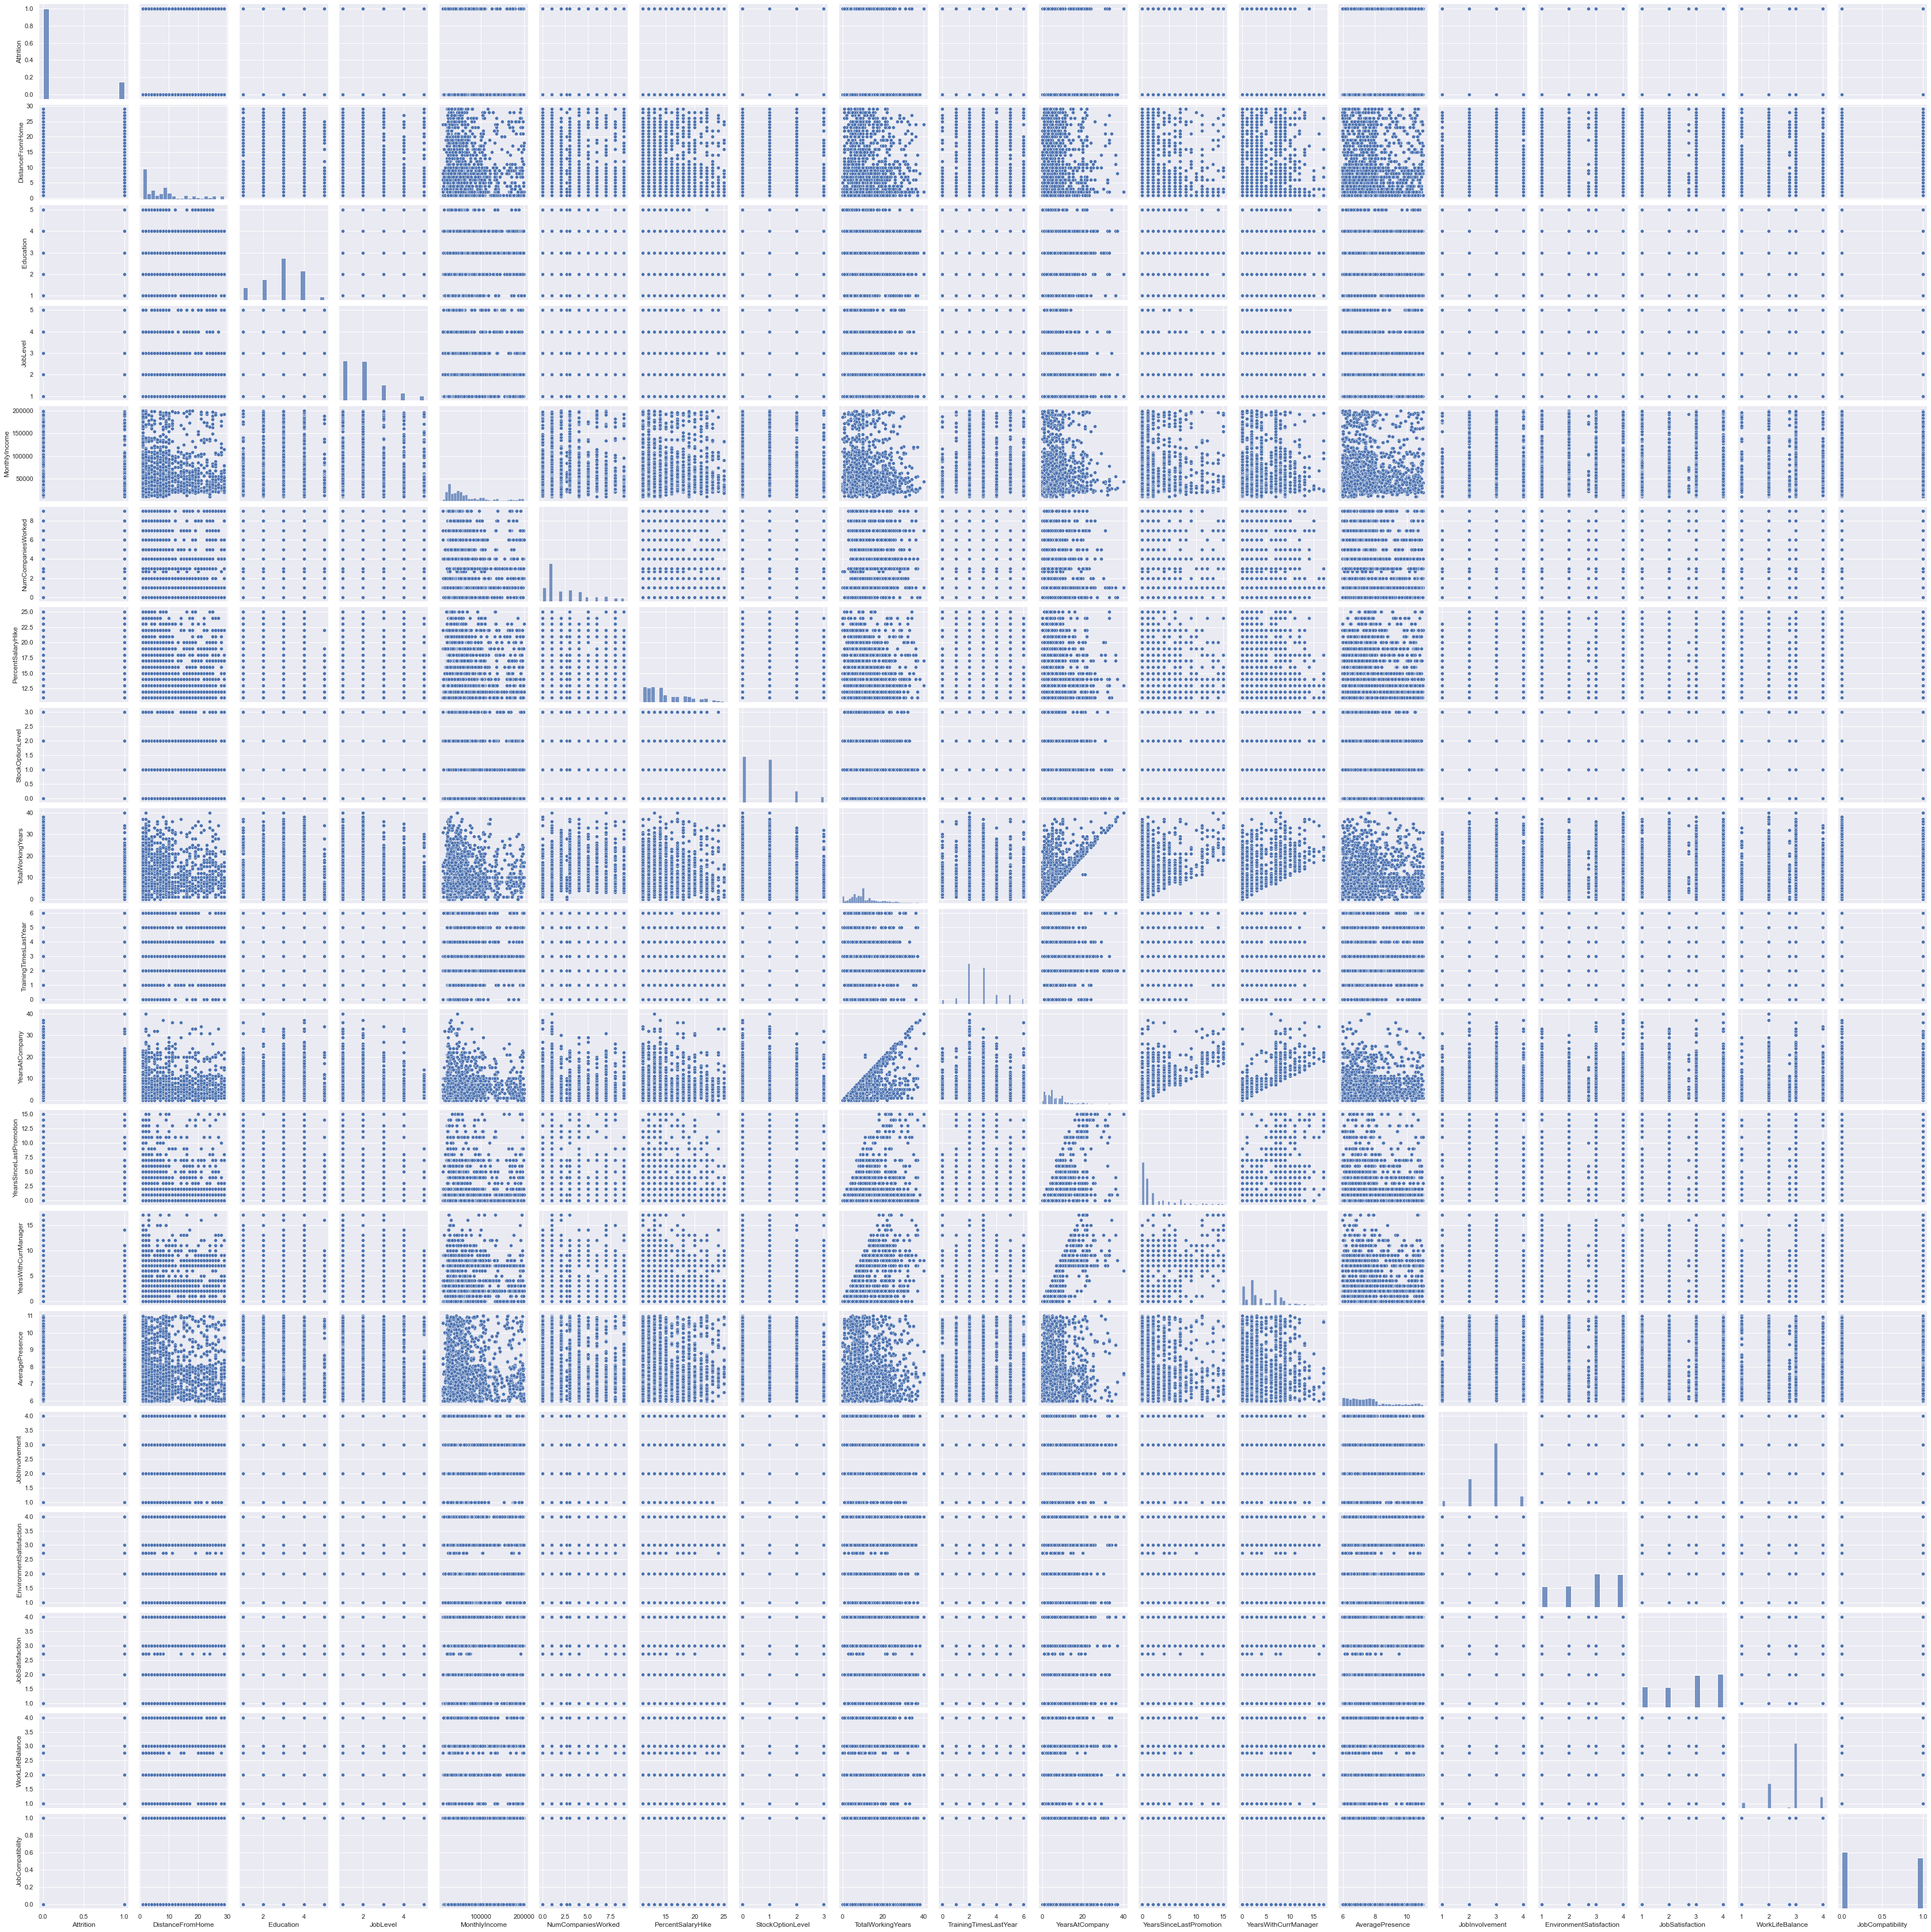

In [36]:
sns.pairplot(general_data_copy,diag_kind='auto')
plt.show()

In [37]:
# Can you check to see if there are any missing values in our data set
general_data_copy.shape

(4410, 23)

In [38]:
#Calcul du taux de turnover, basé sur la colonne Attrition
turnover_rate = general_data_copy.Attrition.value_counts() / 4410
turnover_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [39]:
general_data_copy.describe()

,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.161224,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,7.700792,2.729932,2.723603,2.728246,2.761436,0.474830
std,0.367780,8.105026,1.023933,1.106689,47068.888559,2.493497,3.659108,0.851883,7.774275,1.288978,6.125135,3.221699,3.567327,1.340218,0.711400,1.089654,1.098753,0.703195,0.499423
min,0.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.950504,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,6.673333,2.000000,2.000000,2.000000,2.000000,0.000000
50%,0.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,7.406761,3.000000,3.000000,3.000000,3.000000,0.000000
75%,0.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,8.368703,3.000000,4.000000,4.000000,3.000000,1.000000
max,1.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,11.030960,4.000000,4.000000,4.000000,4.000000,1.000000


In [40]:
#On affiche la répartition des employés sur chaque attribut en fonction de "Attrition"
turnover_Summary = general_data_copy.groupby('Attrition')
turnover_Summary.mean()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
Attrition,,,,,,,,,,,,,,,,,,
0,9.227088,2.919708,2.068938,65672.595296,2.648668,15.157340,0.796431,11.859681,2.827251,7.369019,2.234388,4.367397,7.582297,2.734793,2.772228,2.777734,2.780722,0.475264
1,9.012658,2.877637,2.037975,61682.616034,2.934992,15.481013,0.780591,8.263797,2.654008,5.130802,1.945148,2.852321,8.317264,2.704641,2.470630,2.470785,2.661105,0.472574


In [41]:
turnover_Summary.std()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
Attrition,,,,,,,,,,,,,,,,,,
0,8.167978,1.025784,1.115967,47472.814021,2.455544,3.634551,0.850621,7.755226,1.311493,6.094649,3.233887,3.593144,1.283347,0.701315,1.068329,1.088768,0.678232,0.499455
1,7.772368,1.014233,1.057485,44792.067695,2.671279,3.775289,0.858899,7.155717,1.154834,5.941598,3.148633,3.138918,1.456749,0.761739,1.162887,1.115161,0.814109,0.499599


,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
Attrition,1.000000,-0.009730,-0.015111,-0.010290,-0.031176,0.042232,0.032533,-0.006839,-0.170111,-0.049431,-0.134392,-0.033019,-0.156199,0.201688,-0.015588,-0.101795,-0.102743,-0.062561,-0.001981
DistanceFromHome,-0.009730,1.000000,-0.008638,-0.037329,-0.021607,-0.013818,0.038125,0.011169,0.009361,-0.009001,0.031684,0.002290,0.021584,0.009429,-0.001837,0.020109,-0.011119,0.007961,0.032884
Education,-0.015111,-0.008638,1.000000,0.045746,0.006410,-0.016219,-0.040531,0.001261,-0.010712,0.010472,0.006080,0.022490,0.005358,0.002229,-0.018279,-0.045317,-0.004160,-0.006388,-0.029568
JobLevel,-0.010290,-0.037329,0.045746,1.000000,0.047316,-0.009844,0.010973,0.000993,-0.036934,-0.032500,-0.064219,-0.060811,-0.055251,0.012559,-0.012630,-0.024409,-0.018230,-0.027538,-0.008167
MonthlyIncome,-0.031176,-0.021607,0.006410,0.047316,1.000000,-0.020710,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304,-0.012223,0.023346,-0.005981,0.005055,0.003553,0.005665
NumCompaniesWorked,0.042232,-0.013818,-0.016219,-0.009844,-0.020710,1.000000,0.030825,0.017130,0.238052,-0.032239,-0.117820,-0.036618,-0.109480,-0.014909,0.027921,0.012936,-0.055936,-0.008667,-0.000804
PercentSalaryHike,0.032533,0.038125,-0.040531,0.010973,0.004325,0.030825,1.000000,0.012548,-0.018717,-0.037392,-0.029707,-0.029542,-0.040864,0.029178,-0.004658,0.000838,0.030756,-0.040409,0.007727
StockOptionLevel,-0.006839,0.011169,0.001261,0.000993,0.026930,0.017130,0.012548,1.000000,0.002693,-0.069902,0.007886,0.019063,0.017757,-0.012894,0.010295,-0.004583,0.039821,-0.022787,-0.000202
TotalWorkingYears,-0.170111,0.009361,-0.010712,-0.036934,-0.033758,0.238052,-0.018717,0.002693,1.000000,-0.040705,0.626876,0.403995,0.458425,-0.012428,0.006696,-0.002259,-0.016791,0.001114,0.023421
TrainingTimesLastYear,-0.049431,-0.009001,0.010472,-0.032500,0.050112,-0.032239,-0.037392,-0.069902,-0.040705,1.000000,-0.007894,0.016121,-0.013270,-0.008219,-0.010144,0.017977,-0.021482,-0.015714,-0.008377


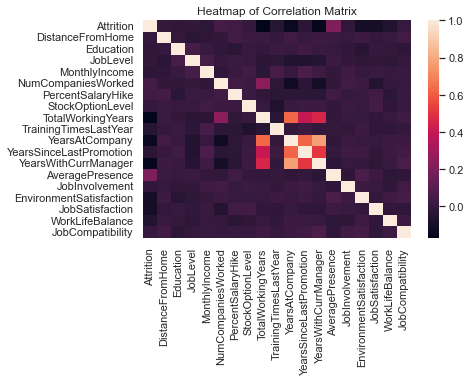

In [42]:
corr = general_data_copy.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

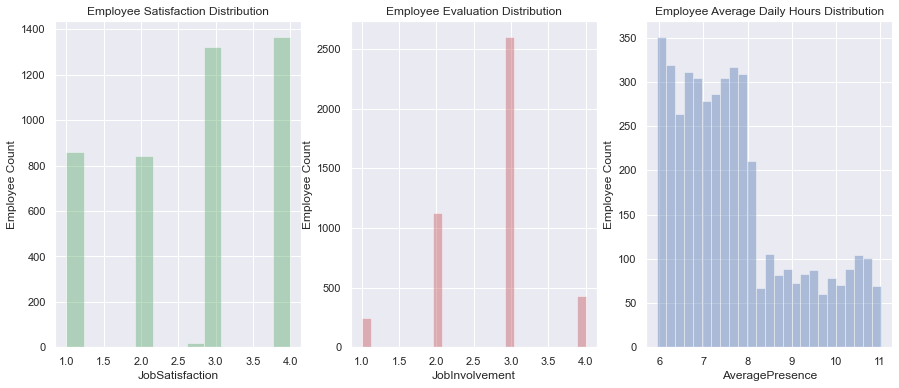

In [43]:
# Plot the distribution of Employee Satisfaction

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(general_data_copy.JobSatisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(general_data_copy.JobInvolvement, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')


# Graph Employee Average Monthly Hours
sns.distplot(general_data_copy.AveragePresence, kde=False, color="b", ax=axes[2]).set_title('Employee Average Daily Hours Distribution')
axes[2].set_ylabel('Employee Count')

plt.savefig(f'analyse/distribution.png', bbox_inches='tight', facecolor='white')

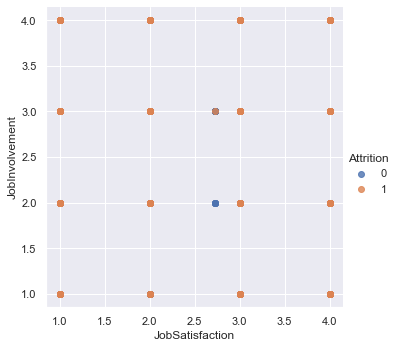

In [44]:
#Satisfaction VS Evaluation
sns.lmplot(x='JobSatisfaction', y='JobInvolvement', data=general_data_copy,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage

plt.savefig(f'analyse/cluster.png', bbox_inches='tight', facecolor='white')

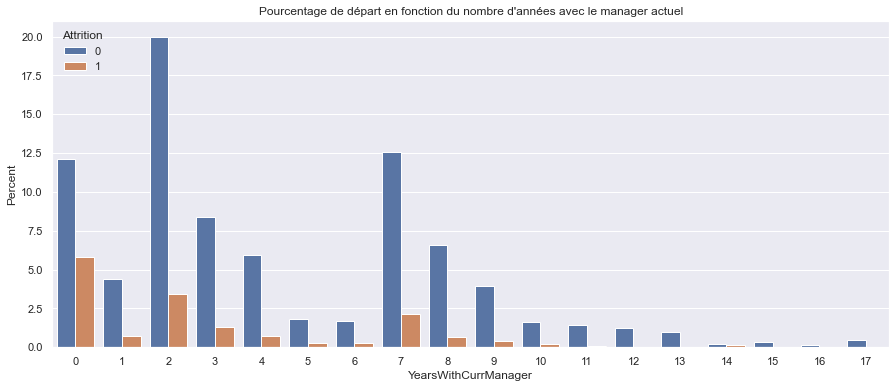

In [45]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(x="YearsWithCurrManager", y="YearsWithCurrManager", hue="Attrition", data=general_data_copy, estimator=lambda x: len(x) / len(general_data_copy) * 100)

ax.set(ylabel="Percent")
plt.title("Pourcentage de départ en fonction du nombre d'années avec le manager actuel")

plt.show()
#Pas de liens apparent

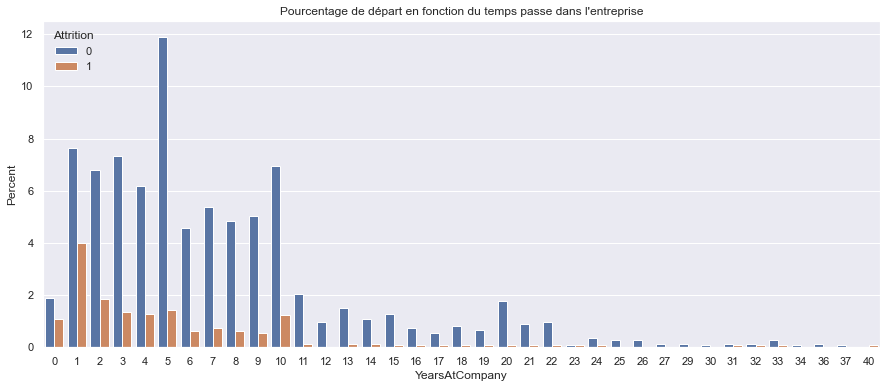

In [46]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="Attrition", data=general_data_copy, estimator=lambda x: len(x) / len(general_data_copy) * 100)

ax.set(ylabel="Percent")
plt.title("Pourcentage de départ en fonction du temps passe dans l'entreprise")

plt.savefig(f'analyse/Pourcentage de départ en fonction du temps passe dans la company.png', bbox_inches='tight', facecolor='white')

plt.show()

K-Means Clustering du départ des employés

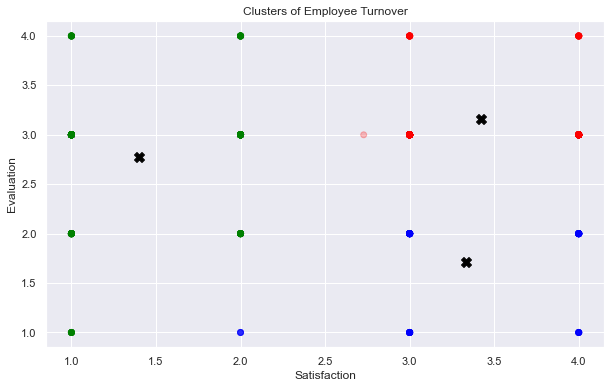

In [47]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(general_data_copy[general_data_copy.Attrition==1][["JobSatisfaction","JobInvolvement"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="JobSatisfaction",y="JobInvolvement", data=general_data_copy[general_data_copy.Attrition==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")

plt.savefig(f'analyse/Kmeans_clustering.png', bbox_inches='tight', facecolor='white')

plt.show()


Cluster 1 (Bleu): employés peu travailleurs et heureux

Cluster 2 (Vert): employés travailleurs et triste

Cluster 3 (Rouge): employés travailleurs et heureux

KDEPlot: Kernel Density Estimate Plot

Un graphique d'estimation de densité de noyau (KDE) est une méthode permettant de visualiser la distribution des observations dans un ensemble de données, analogue à un histogramme. KDE représente les données à l'aide d'une courbe de densité de probabilité continue dans une ou plusieurs dimensions.

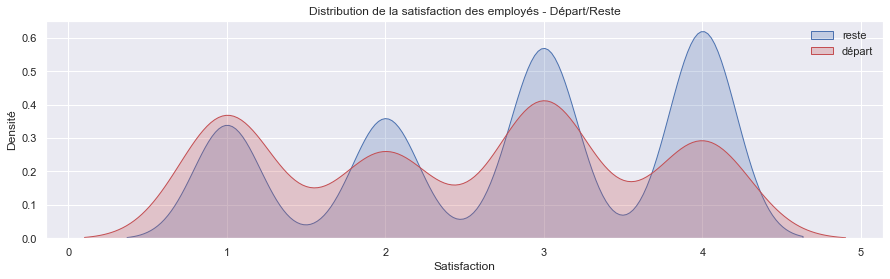

In [48]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(general_data_copy.loc[(general_data_copy['Attrition'] == 0),'JobSatisfaction'] , color='b',shade=True, label='reste')
ax=sns.kdeplot(general_data_copy.loc[(general_data_copy['Attrition'] == 1),'JobSatisfaction'] , color='r',shade=True, label='départ')
ax.set(xlabel='Satisfaction', ylabel='Densité')
plt.title('Distribution de la satisfaction des employés - Départ/Reste')
plt.legend()

plt.savefig(f'analyse/KDEPlot.png', bbox_inches='tight', facecolor='white')

Distribution du temps de travail moyen par jour en fonction des employés

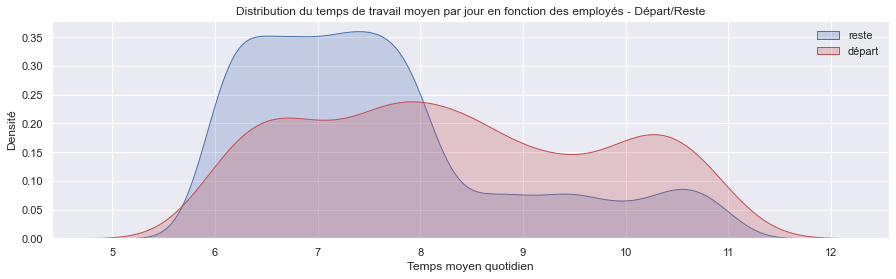

In [49]:
#KDEPlot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(general_data_copy.loc[(general_data_copy['Attrition'] == 0),'AveragePresence'] , color='b',shade=True, label='reste')
ax=sns.kdeplot(general_data_copy.loc[(general_data_copy['Attrition'] == 1),'AveragePresence'] , color='r',shade=True, label='départ')
ax.set(xlabel='Temps moyen quotidien', ylabel='Densité')
plt.title('Distribution du temps de travail moyen par jour en fonction des employés - Départ/Reste')
plt.legend()

plt.savefig(f'analyse/KDEPlot_Distribution du temps de travail moyen par jour en fonction des employés.png', bbox_inches='tight', facecolor='white')

Distribution des employés par département

In [50]:
hrleft = general_data_copy[general_data_copy['Attrition']==1]

hrleft = pd.DataFrame(hrleft.Department.value_counts()).reset_index()
hrstay = pd.DataFrame(general_data_copy.Department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"Department_x":'left', "Department_y":'stay', "index":'department' })
hr_merge

,department,left,stay
0,Research & Development,453,2883
1,Sales,201,1338
2,Human Resources,57,189


On représente ces données sur un graphique

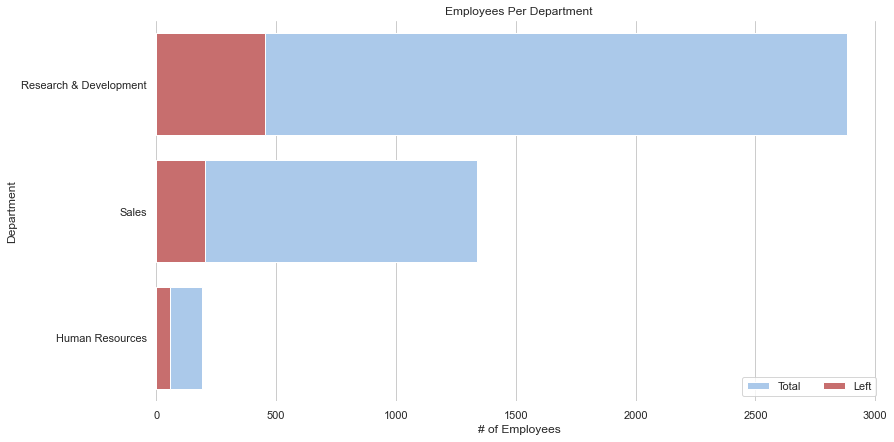

In [51]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 7))

sns.set_color_codes("pastel")
sns.barplot(x="stay", y='department', data=hr_merge,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="left", y="department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

plt.savefig(f'analyse/EmployeesPerDepartment.png', bbox_inches='tight', facecolor='white')

In [52]:
non_numeric_columns = general_data_copy.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole'], dtype='object')


In [53]:

general_data_copy['BusinessTravel'] = general_data_copy['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
general_data_copy['Department'] = general_data_copy['Department'].replace({'Research & Development': 0, 'Sales': 1, 'Human Resources': 2})
general_data_copy['EducationField'] = general_data_copy['EducationField'].replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Other': 4, 'Human Resources': 5 })
general_data_copy['JobRole'] = general_data_copy['JobRole'].replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8 })

general_data_copy.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
0,0,1,1,6,2,0,1,4,131160,1.0,11,0,1.0,6,1,0,0,7.373651,3,3.0,4.0,2.0,1
1,1,2,0,10,1,0,1,1,41890,0.0,23,1,6.0,3,5,1,4,7.718969,2,3.0,2.0,4.0,1
2,0,2,0,17,4,4,4,0,193280,1.0,15,3,5.0,2,5,0,3,7.013240,3,2.0,2.0,1.0,1
3,0,0,0,2,5,0,3,8,83210,3.0,11,3,13.0,5,8,7,5,7.193678,2,4.0,4.0,3.0,0
4,0,1,0,10,1,1,1,0,23420,4.0,12,2,9.0,2,6,0,4,8.006175,3,4.0,1.0,3.0,0


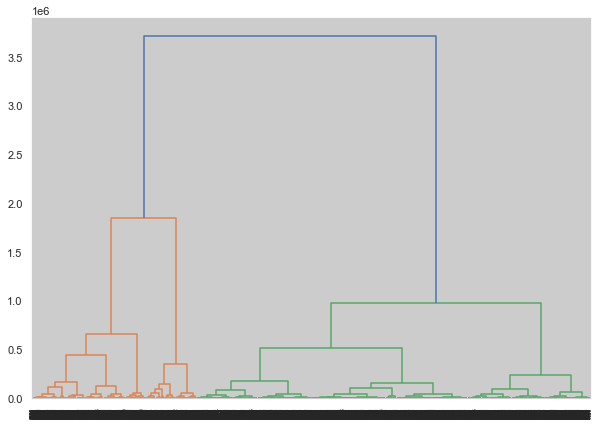

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Construction et affichage du dendogramme résultant
plt.figure(figsize=(10, 7))
dendrogram(linkage(general_data_copy, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.savefig(f'analyse/dendogramme.png', bbox_inches='tight', facecolor='white')

plt.show()

In [55]:
#Comme fait précedemment, on recalcule le ratio départ
general_data_copy.Attrition.value_counts() / 4410

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

df = general_data_copy

# Séparez le DataFrame en variables indépendantes (X) et dépendante (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Divisez les données en jeux d'entraînement et de test
# test_size représente la proportion du dataset à inclure dans le jeu de test
# random_state est une graine pour la génération de nombres aléatoires, assurant la reproductibilité
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print(f"Training set (X_train): {X_train.shape}")
print(f"Test set (X_test): {X_test.shape}")


Training set (X_train): (3528, 22)
Test set (X_test): (882, 22)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

###
#####
# Préparation des données
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Diviser les données en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###
#####
# Entraînement du modèle de régression logistique
# Création d'une instance du modèle
logreg = LogisticRegression()

# Entraînement du modèle sur le jeu de données d'entraînement
logreg.fit(X_train, y_train)

###
#####
# Prédiction et évaluation
# Prédiction sur le jeu de données de test
y_pred = logreg.predict(X_test)

# Affichage du rapport de classification et de la matrice de confusion
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.00      0.00      0.00       141

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882

[[741   0]
 [141   0]]


Precision :

Pour chaque classe, elle indique la proportion de prédictions correctes parmi toutes les prédictions faites pour cette classe.
Par exemple, une précision de 0.84 pour la classe 0 signifie que 84% des prédictions de la classe 0 étaient correctes.

Recall (Rappel) :

Pour chaque classe, elle mesure la proportion de prédictions correctes par rapport au nombre total d'instances réelles de cette classe dans les données de test.
Un rappel de 1.00 pour la classe 0 signifie que le modèle a correctement identifié 100% des instances de la classe 0, mais un rappel de 0.00 pour la classe 1 indique que le modèle n'a correctement identifié aucune instance de la classe 1.


F1-Score :

Il s'agit de la moyenne harmonique de la précision et du rappel. Un score F1 élevé signifie que le modèle a une bonne précision et un bon rappel.
Un score F1 de 0.91 pour la classe 0 est très bon, mais un score F1 de 0.00 pour la classe 1 est très mauvais.


Support :

Le support est le nombre d'occurrences réelles de chaque classe dans votre jeu de données de test.
Ici, il y a 741 instances de la classe 0 et 141 de la classe 1 dans vos données de test.


Accuracy (Précision Globale) :

La précision globale est de 0.84, ce qui signifie que le modèle a correctement prédit 84% de toutes les instances de test.


Macro avg et Weighted avg :

La moyenne macro calcule la moyenne des métriques pour chaque classe, sans tenir compte de l'équilibre entre les classes.
La moyenne pondérée tient compte du support de chaque classe.

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Séparation des features et de la target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Division en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Application de SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Vérification des nouvelles distributions
print("Distribution avant SMOTE:", y_train.value_counts())
print("Distribution après SMOTE:", pd.Series(y_train_res).value_counts())


Distribution avant SMOTE: 0    2958
1     570
Name: Attrition, dtype: int64
Distribution après SMOTE: 0    2958
1    2958
Name: Attrition, dtype: int64


In [62]:
# Création d'une instance du modèle
model = LogisticRegression()

# Entraînement du modèle sur le jeu de données d'entraînement rééquilibré
model.fit(X_train_res, y_train_res)

# Prédiction sur le jeu de données de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.00      0.00      0.00       141

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882



Forêts Aléatoires (Random Forests)


Avantages : Bonne performance sur de nombreux problèmes de classification sans nécessiter un réglage minutieux des hyperparamètres. Gère bien à la fois les features numériques et catégorielles, et est moins susceptible au surajustement que les arbres de décision.

Utilisation : Utilisé pour la classification (et la régression), particulièrement utile pour gérer des jeux de données complexes avec des interactions entre features.

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Création de l'instance du modèle
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur le jeu de données d'entraînement
rf_classifier.fit(X_train, y_train)

# Prédiction sur le jeu de données de test
y_pred = rf_classifier.predict(X_test)

# Affichage du rapport de classification
print(classification_report(y_test, y_pred))

# Affichage de la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Affichage de l'accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.95      0.97       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882

Matrice de confusion :
[[741   0]
 [  7 134]]
Accuracy : 0.9920634920634921


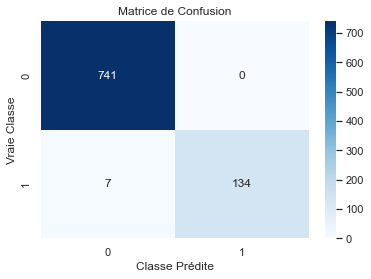

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.title('Matrice de Confusion')

os.makedirs('results', exist_ok=True)
plt.savefig(f'results/RadomForests_matrice_de_confusion.png', bbox_inches='tight', facecolor='white')

plt.show()

ROC et AUC


La Courbe ROC (Receiver Operating Characteristic) et l'AUC (Area Under the Curve) sont des outils d'évaluation utilisés pour mesurer la performance des modèles de classification, en particulier dans les contextes où les classes sont déséquilibrées. Voici une définition de ces deux termes :

Courbe ROC

La courbe ROC est un graphique qui montre la performance d'un modèle de classification à tous les seuils de classification possibles. Cette courbe trace deux paramètres :
    Le taux de vrais positifs (TPR, True Positive Rate) sur l'axe des ordonnées. TPR est aussi appelé sensibilité, et il mesure la proportion de positifs réels qui sont correctement identifiés par le modèle.
    Le taux de faux positifs (FPR, False Positive Rate) sur l'axe des abscisses. FPR est 1 moins la spécificité, et il mesure la proportion de négatifs réels qui sont incorrectement identifiés comme positifs par le modèle.
L'objectif est d'avoir un modèle qui maximise le TPR tout en minimisant le FPR. Une courbe ROC plus "élevée" et plus proche du coin supérieur gauche indique une meilleure performance.

AUC

L'AUC, ou l'aire sous la courbe ROC, est un seul nombre qui résume la performance du modèle sur tous les seuils possibles. L'AUC varie entre 0 et 1 :
    Une AUC de 1 indique un modèle parfait qui classe correctement tous les positifs et négatifs.
    Une AUC de 0.5 indique un modèle qui n'a pas de capacité de classification mieux que le hasard.
    Une AUC inférieure à 0.5 suggère que les prédictions du modèle sont généralement inversées; le modèle est pire que le hasard, mais inverser ses prédictions améliorerait sa performance.
L'AUC est particulièrement utile pour évaluer des modèles sur des jeux de données déséquilibrés, car elle n'est pas affectée par le changement de seuil de classification et donne une mesure de la qualité du classement des observations par le modèle, indépendamment de tout seuil spécifique.

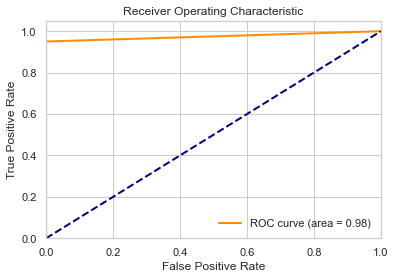

AUC-ROC: 1.000


In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_bin = label_binarize(y_pred, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig(f'results/RadomForests_roc_auc.png', bbox_inches='tight', facecolor='white')

plt.show()

#valeurs numériques
y_pred_proba = rf_classifier.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])  # y_pred_proba est la probabilité de la classe positive
print(f"AUC-ROC: {auc_roc:.3f}")


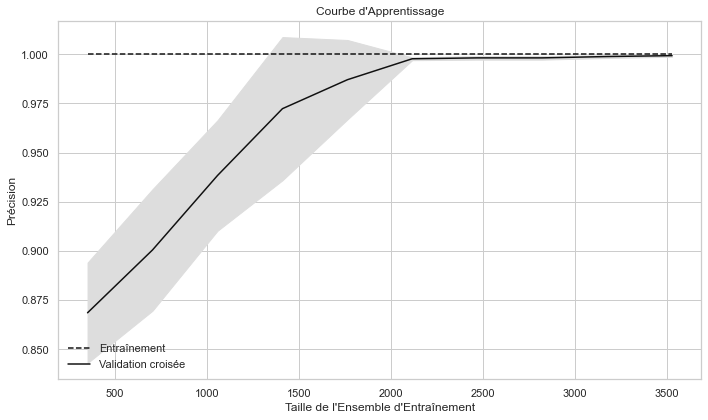

(None, None)

In [72]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Définir le modèle (ajustez les paramètres selon votre cas d'utilisation)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Définir les plages de taille de l'ensemble d'entraînement
train_sizes, train_scores, test_scores = learning_curve(model, X, y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5, # Nombre de folds dans la validation croisée
                                                        scoring='accuracy',
                                                        n_jobs=-1, # Utilisez -1 pour utiliser tous les processeurs
                                                        random_state=42)

# Calculer la moyenne et l'écart-type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dessiner les courbes
plt.subplots(1, 1, figsize=(10, 6))
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Entraînement")
plt.plot(train_sizes, test_mean, color="#111111", label="Validation croisée")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Courbe d'Apprentissage")
plt.xlabel("Taille de l'Ensemble d'Entraînement"), plt.ylabel("Précision"), plt.legend(loc="best")

plt.savefig(f'results/RadomForests_courbe_apprentissage.png', bbox_inches='tight', facecolor='white')

plt.tight_layout(), plt.show()


Fine Tunning

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Définissez le modèle
model = RandomForestClassifier()

# Grille des hyperparamètres à tester
param_distributions = {
    'n_estimators': np.arange(100, 501, 50),  # Nombre d'arbres
    'max_features': ['auto', 'sqrt', 'log2'],  # Nombre de features à considérer à chaque split
    'max_depth': np.arange(10, 101, 10),  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimal de samples requis pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimal de samples requis à chaque feuille
    'bootstrap': [True, False]  # Méthode de sélection des samples pour l'entraînement de chaque arbre
}

# Configuration de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_distributions,
                                   n_iter=100,  # Nombre d'itérations de recherche
                                   cv=5,  # Nombre de folds de validation croisée
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)  # Utilise tous les processeurs disponibles

# Appliquer Random Search
# Remplacez X_train, y_train, X_test, y_test par vos données
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", random_search.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_model = RandomForestClassifier(**random_search.best_params_)
best_model.fit(X_train, y_train)

# Faire des prédictions sur le jeu de test
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Pour AUC-ROC

# Calculer et afficher les métriques
print("Accuracy sur le jeu de test:", accuracy_score(y_test, y_pred))
print("Précision sur le jeu de test:", precision_score(y_test, y_pred, average='macro'))
print("Rappel sur le jeu de test:", recall_score(y_test, y_pred, average='macro'))
print("F1-score sur le jeu de test:", f1_score(y_test, y_pred, average='macro'))
print("AUC-ROC sur le jeu de test:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleurs hyperparamètres: {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Accuracy sur le jeu de test: 0.9931972789115646
Précision sur le jeu de test: 0.9959839357429718
Rappel sur le jeu de test: 0.9787234042553192
F1-score sur le jeu de test: 0.9871143057503506
AUC-ROC sur le jeu de test: 0.9999138599362563


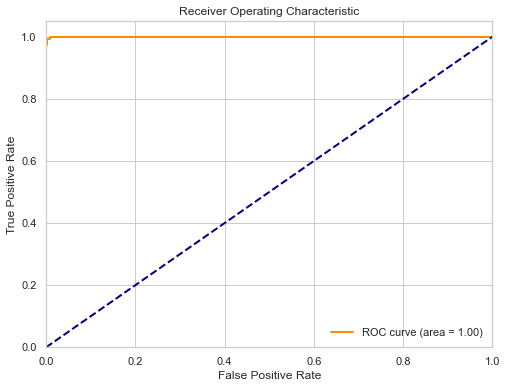

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les taux de faux et vrai positifs et déterminer l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig(f'results/RadomForests_finetunning_roc.png', bbox_inches='tight', facecolor='white')

plt.show()

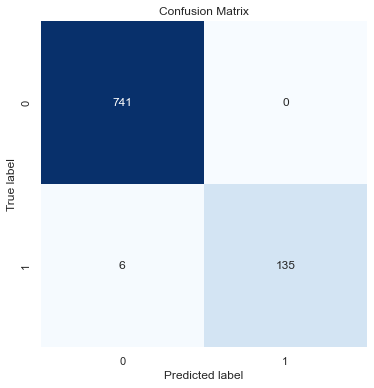

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)

# Tracer la matrice de confusion
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.savefig(f'results/RadomForests_finetunning_matrice_confusion.png', bbox_inches='tight', facecolor='white')

plt.show()

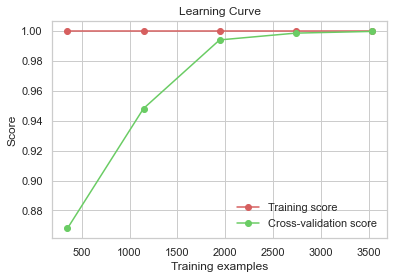

In [77]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y,
                                                        train_sizes=np.linspace(.1, 1.0, 5),
                                                        cv=5, n_jobs=-1,
                                                        scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title('Learning Curve')

plt.savefig(f'results/RadomForests_finetunning_courbe_apprentissage.png', bbox_inches='tight', facecolor='white')

plt.show()

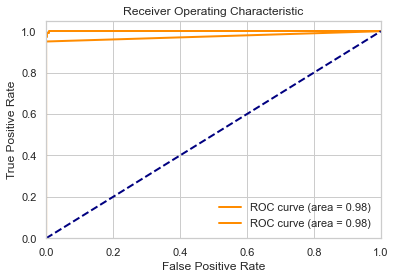

In [81]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
fpr_tunning, tpr_tunning, _ = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_tunning, tpr_tunning, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig(f'results/Total_roc_auc.png', bbox_inches='tight', facecolor='white')

plt.show()